In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# import libraries 
import mlx 
import mlx.nn as nn 
import mlx.optim as optim

# import torch 
# import torch.nn as nn 
# import torch.optim as optim 
from torch.utils.data import TensorDataset, DataLoader, Dataset
from torch.autograd import Variable
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

ModuleNotFoundError: No module named 'mlx.optim'

In [50]:
# HyperParams 
input_dim = 28 * 28 
output_dim = 10 
batch_size = 100 
num_epochs = 30
learning_rate = 1E-2

In [51]:
# load the data using pandas
train_df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [52]:
# examine train_df
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Define PyTorch Dataset  
class MNIST_Data(Dataset):
    def __init__(self, imgs, labels): 
        self.imgs =  torch.from_numpy(imgs)/ 255 # Normalization 
        self.labels =  torch.from_numpy(labels).type(torch.LongTensor) # convert to long
        
    def __len__(self): 
        return len(self.labels)
    
    def __getitem__(self, index): 
        return self.imgs[index] , self.labels[index]

In [54]:
imgs_train, imgs_test, labels_train, labels_test = train_test_split(train_df.loc[:,train_df.columns != "label"].values,
                                                                             train_df['label'].values,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

In [55]:
MNIST_train = MNIST_Data(imgs_train,  labels_train )
MNIST_test = MNIST_Data(imgs_test,  labels_test )

In [56]:
loaders = { 
    'train': DataLoader(MNIST_train, batch_size = batch_size, shuffle = True) , 
    'test': DataLoader(MNIST_test, batch_size = batch_size, shuffle = True) ,
}

In [57]:
loaders['train']

In [58]:
# Create Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        # Linear part
        self.linear = nn.Linear(input_dim, output_dim)
        # There should be logistic function right?
        # However logistic function in pytorch is in loss function
        # So actually we do not forget to put it, it is only at next parts
    
    def forward(self, x):
        out = self.linear(x)
        return out

# Instantiate Model Class
input_dim = 28*28 # size of image px*px
output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9

# create logistic regression model
model = LogisticRegressionModel(input_dim, output_dim)

# Cross Entropy Loss  
error = nn.CrossEntropyLoss()

# SGD Optimizer 
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [59]:
# Traning the Model
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(loaders['train']):
        
        # Define variables
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
       # Prediction
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in loaders['test']: 
                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.3977135121822357  Accuracy: 89.25%
Iteration: 1000  Loss: 0.4064241349697113  Accuracy: 90.75%
Iteration: 1500  Loss: 0.3076643645763397  Accuracy: 91.41666412353516%
Iteration: 2000  Loss: 0.2212640792131424  Accuracy: 91.73809814453125%
Iteration: 2500  Loss: 0.2436545044183731  Accuracy: 91.77381134033203%
Iteration: 3000  Loss: 0.37115997076034546  Accuracy: 91.79762268066406%
Iteration: 3500  Loss: 0.20796141028404236  Accuracy: 92.14286041259766%
Iteration: 4000  Loss: 0.2178848385810852  Accuracy: 91.97618865966797%
Iteration: 4500  Loss: 0.23608998954296112  Accuracy: 92.22618865966797%
Iteration: 5000  Loss: 0.2761010229587555  Accuracy: 92.21428680419922%
Iteration: 5500  Loss: 0.2128516137599945  Accuracy: 92.13095092773438%
Iteration: 6000  Loss: 0.286912202835083  Accuracy: 92.16666412353516%
Iteration: 6500  Loss: 0.2878474295139313  Accuracy: 92.08333587646484%
Iteration: 7000  Loss: 0.2928959131240845  Accuracy: 92.29762268066406%
Iteration: 7500

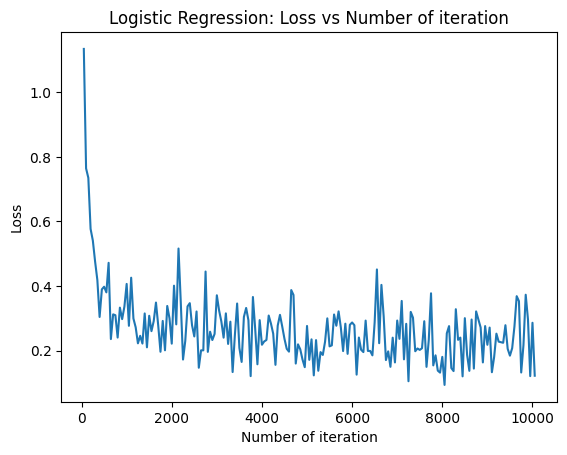

In [60]:
# visualization
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()

In [61]:
# Create CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1
        self.fc1 = nn.Linear(32 * 4 * 4, 10) 
    
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2 
        out = self.maxpool2(out)
        
        # flatten
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)
        
        return out

# batch_size, epoch and iteration
batch_size = 100
num_epochs = 30
    
# Create CNN
model = CNNModel()

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [62]:
# CNN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(loaders['train']):
        
        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in loaders['test']:
                
                test = Variable(images.view(100,1,28,28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.11837050318717957  Accuracy: 96.77381134033203 %
Iteration: 1000  Loss: 0.0766167938709259  Accuracy: 97.32142639160156 %
Iteration: 1500  Loss: 0.026291199028491974  Accuracy: 98.30952453613281 %
Iteration: 2000  Loss: 0.03881312906742096  Accuracy: 98.42857360839844 %
Iteration: 2500  Loss: 0.031910184770822525  Accuracy: 98.38095092773438 %
Iteration: 3000  Loss: 0.010356503538787365  Accuracy: 98.67857360839844 %
Iteration: 3500  Loss: 0.008165407925844193  Accuracy: 98.60713958740234 %
Iteration: 4000  Loss: 0.0023274451959878206  Accuracy: 98.66666412353516 %
Iteration: 4500  Loss: 0.006095242686569691  Accuracy: 98.79762268066406 %
Iteration: 5000  Loss: 0.03015216812491417  Accuracy: 98.72618865966797 %
Iteration: 5500  Loss: 0.007432345300912857  Accuracy: 98.8452377319336 %
Iteration: 6000  Loss: 0.016031520441174507  Accuracy: 98.88095092773438 %
Iteration: 6500  Loss: 0.010560260154306889  Accuracy: 98.92857360839844 %
Iteration: 7000  Loss: 0.010041